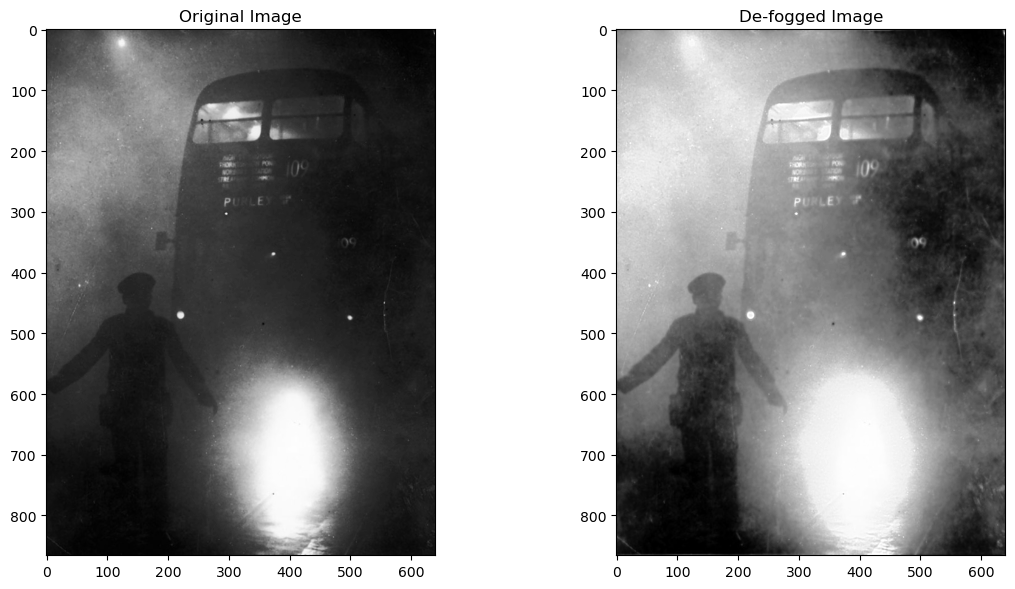

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(img, d0, n):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), dtype=float)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (d / d0) ** (2 * n))
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    filtered_shift = dft_shift * mask
    dft_ishift = np.fft.ifftshift(filtered_shift)
    filtered_img = np.fft.ifft2(dft_ishift)
    filtered_img = np.abs(filtered_img)
    return filtered_img

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img_eq = cdf[img.astype('uint8')]
    return img_eq

def de_fog(image_path, d0, n):
    img = cv2.imread(image_path, 0)
    if img is None:
        raise ValueError(f"Could not load the image from the path: {image_path}")
    low_freq_img = butterworth_lowpass_filter(img, d0, n)
    high_freq_img = img - low_freq_img
    low_freq_eq = histogram_equalization(np.uint8(low_freq_img))
    de_fogged_img = np.uint8(np.clip(low_freq_eq + high_freq_img, 0, 255))
    return de_fogged_img

d0 = 90
n = 2
image_path_original = '3.png'
de_fogged_image = de_fog(image_path_original, d0, n)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
original_image = cv2.imread(image_path_original, 0)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(de_fogged_image, cmap='gray')
plt.title('De-fogged Image')

plt.tight_layout()
plt.show()

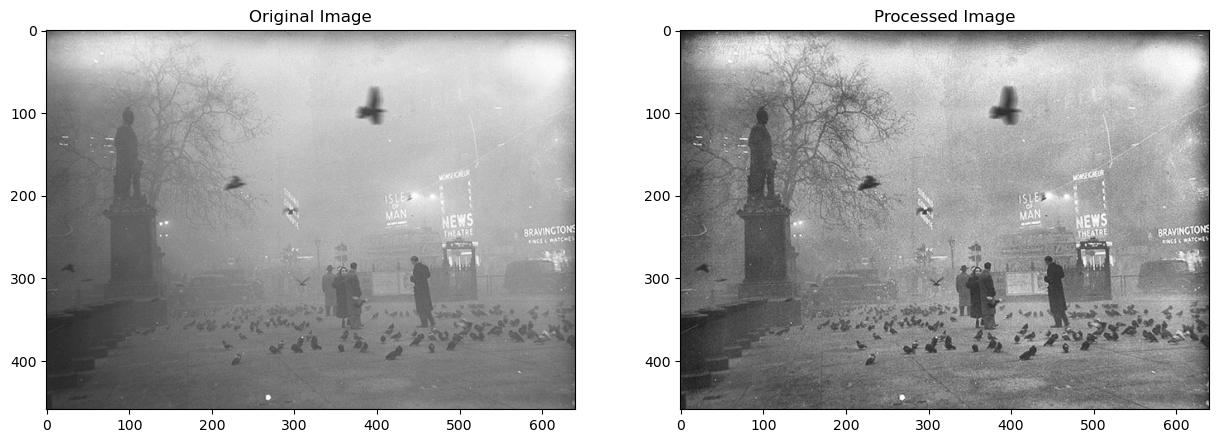

'processed_image.png'

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_clahe(bgr_image, clip_limit=2.0, tile_grid_size=(8, 8)):
    lab_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l_channel)
    merged_channels = cv2.merge((cl, a_channel, b_channel))
    bgr_clahe_image = cv2.cvtColor(merged_channels, cv2.COLOR_LAB2BGR)
    return bgr_clahe_image

def enhance_color(bgr_image, saturation_scale=1.2):
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv2.split(hsv_image)
    s_channel = cv2.multiply(s_channel, np.array([saturation_scale]))
    s_channel = np.clip(s_channel, 0, 255)
    hsv_enhanced = cv2.merge((h_channel, s_channel, v_channel))
    bgr_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)
    return bgr_enhanced

def process_image(image_path):
    bgr_img = cv2.imread(image_path)
    bgr_clahe_img = apply_clahe(bgr_img)
    bgr_enhanced_img = enhance_color(bgr_clahe_img)
    return bgr_enhanced_img

image_path = '1.png'
processed_img = process_image(image_path)

output_file_path = 'processed_image.png'
cv2.imwrite(output_file_path, processed_img)

original_img = cv2.imread(image_path)
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
processed_img_rgb = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(processed_img_rgb)
plt.title('Processed Image')
plt.show()

output_file_path